In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import json

In [4]:
# read in data
file_1 ='ready_poems.csv'
file_2 ='news_summaries.csv'
file_3 ='roc.csv'

df_1 = pd.read_csv(file_1)
df_2 = pd.read_csv(file_2)
df_3 = pd.read_csv(file_3)

In [6]:
df_1.head()

,Unnamed: 0,title,author,content,tags
0,0,Do not go gentle into that good night,Dylan Thomas,do not go gentle into that good night NEWLINE ...,[]
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,how do i love thee let me count the ways NEWLI...,[]
2,2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall i compare thee to a summers day NEWLINE ...,[]
3,3,If—,Rudyard Kipling,if you can keep your head when all about you N...,[]
4,4,Nothing Gold Can Stay,Robert Frost,natures first green is gold NEWLINE her hardes...,[]


In [7]:
df_2.head()

,headlines,text,date,author,read_more
0,"CBI books Rajasthan CM's brother, 14 others in...",The CBI has registered a case against Rajastha...,"17 Jun 2022,Friday",Shreyasi Banerjee,https://www.timesnownews.com/india/cbi-raids-r...
1,Fan shares selfie taken by SRK with his father...,Twitter user Rohan Mukherjee shared that his f...,"17 Jun 2022,Friday",Daisy Mowke,None
2,European Commission recommends Ukraine be gran...,The European Commission on Friday recommended ...,"17 Jun 2022,Friday",Athira Sasidharan,https://www.reuters.com/world/europe/europe-st...
3,Jos Buttler smashes England's second-fastest O...,England's Jos Buttler on Friday smashed the se...,"17 Jun 2022,Friday",Anmol Sharma,https://www.icc-cricket.com/match/34010?utm_ca...
4,Paytm CEO Vijay Shekhar buys 1.7 lakh shares o...,Paytm Founder and CEO Vijay Shekhar Sharma has...,"17 Jun 2022,Friday",Hiral Goyal,https://www.financialexpress.com/market/vijay-...


In [8]:
df_3.head()

,storyid,storytitle,sentence1,sentence2,sentence3,sentence4,sentence5
0,8bbe6d11-1e2e-413c-bf81-eaea05f4f1bd,David Drops the Weight,David noticed he had put on a lot of weight re...,He examined his habits to try and figure out t...,He realized he'd been eating too much fast foo...,He stopped going to burger places and started ...,"After a few weeks, he started to feel much bet..."
1,0beabab2-fb49-460e-a6e6-f35a202e3348,Frustration,Tom had a very short temper.,One day a guest made him very angry.,He punched a hole in the wall of his house.,Tom's guest became afraid and left quickly.,Tom sat on his couch filled with regret about ...
2,87da1a22-df0b-410c-b186-439700b70ba6,Marcus Buys Khakis,Marcus needed clothing for a business casual e...,All of his clothes were either too formal or t...,He decided to buy a pair of khakis.,The pair he bought fit him perfectly.,Marcus was happy to have the right clothes for...
3,2d16bcd6-692a-4fc0-8e7c-4a6f81d9efa9,Different Opinions,Bobby thought Bill should buy a trailer and ha...,Bill thought a truck would be better for what ...,Bobby pointed out two vehicles were much more ...,Bill was set in his ways with conventional thi...,He ended up buying the truck he wanted despite...
4,c71bb23b-7731-4233-8298-76ba6886cee1,Overcoming shortcomings,John was a pastor with a very bad memory.,He tried to memorize his sermons many days in ...,He decided to learn to sing to overcome his ha...,He then made all his sermons into music and sa...,His congregation was delighted and so was he.


In [9]:
# df_3, i.e, roc data contains sentences in different columns need to combine them into a single column
# Find the columns with "sentence" in the title
columns = [col for col in df_3.columns if 'sentence' in col.lower()]

# Concatenate the aabove columns into a new column labeled text
df_3['text'] = df_3[columns].apply(lambda row: ' '.join(row), axis=1)

In [10]:
# rename columns for standardization
df_1.rename(columns={'content': 'text'}, inplace=True)
df_2.rename(columns={'headlines': 'title'}, inplace=True)
df_3.rename(columns={'storytitle': 'title'}, inplace=True)

In [11]:
df_1 = df_1[['title', 'text']]
df_1.head()

,title,text
0,Do not go gentle into that good night,do not go gentle into that good night NEWLINE ...
1,How Do I Love Thee? (Sonnet 43),how do i love thee let me count the ways NEWLI...
2,Shall I compare thee to a summer’s day? (Sonne...,shall i compare thee to a summers day NEWLINE ...
3,If—,if you can keep your head when all about you N...
4,Nothing Gold Can Stay,natures first green is gold NEWLINE her hardes...


In [12]:
df_2 = df_2[['title', 'text']]
df_2.head()

,title,text,date,author,read_more
0,"CBI books Rajasthan CM's brother, 14 others in...",The CBI has registered a case against Rajastha...,"17 Jun 2022,Friday",Shreyasi Banerjee,https://www.timesnownews.com/india/cbi-raids-r...
1,Fan shares selfie taken by SRK with his father...,Twitter user Rohan Mukherjee shared that his f...,"17 Jun 2022,Friday",Daisy Mowke,None
2,European Commission recommends Ukraine be gran...,The European Commission on Friday recommended ...,"17 Jun 2022,Friday",Athira Sasidharan,https://www.reuters.com/world/europe/europe-st...
3,Jos Buttler smashes England's second-fastest O...,England's Jos Buttler on Friday smashed the se...,"17 Jun 2022,Friday",Anmol Sharma,https://www.icc-cricket.com/match/34010?utm_ca...
4,Paytm CEO Vijay Shekhar buys 1.7 lakh shares o...,Paytm Founder and CEO Vijay Shekhar Sharma has...,"17 Jun 2022,Friday",Hiral Goyal,https://www.financialexpress.com/market/vijay-...


In [13]:
df_3 = df_3[['title', 'text']]
df_3.head()

,storyid,title,sentence1,sentence2,sentence3,sentence4,sentence5,text
0,8bbe6d11-1e2e-413c-bf81-eaea05f4f1bd,David Drops the Weight,David noticed he had put on a lot of weight re...,He examined his habits to try and figure out t...,He realized he'd been eating too much fast foo...,He stopped going to burger places and started ...,"After a few weeks, he started to feel much bet...",David noticed he had put on a lot of weight re...
1,0beabab2-fb49-460e-a6e6-f35a202e3348,Frustration,Tom had a very short temper.,One day a guest made him very angry.,He punched a hole in the wall of his house.,Tom's guest became afraid and left quickly.,Tom sat on his couch filled with regret about ...,Tom had a very short temper. One day a guest m...
2,87da1a22-df0b-410c-b186-439700b70ba6,Marcus Buys Khakis,Marcus needed clothing for a business casual e...,All of his clothes were either too formal or t...,He decided to buy a pair of khakis.,The pair he bought fit him perfectly.,Marcus was happy to have the right clothes for...,Marcus needed clothing for a business casual e...
3,2d16bcd6-692a-4fc0-8e7c-4a6f81d9efa9,Different Opinions,Bobby thought Bill should buy a trailer and ha...,Bill thought a truck would be better for what ...,Bobby pointed out two vehicles were much more ...,Bill was set in his ways with conventional thi...,He ended up buying the truck he wanted despite...,Bobby thought Bill should buy a trailer and ha...
4,c71bb23b-7731-4233-8298-76ba6886cee1,Overcoming shortcomings,John was a pastor with a very bad memory.,He tried to memorize his sermons many days in ...,He decided to learn to sing to overcome his ha...,He then made all his sermons into music and sa...,His congregation was delighted and so was he.,John was a pastor with a very bad memory. He t...


In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# preprocess text ro remove stop words and non-alpha characters
# lematize words
def preprocess(df):

  #combine all text in a df column text
  text = ' '.join(df['text'])

  # tokenize
  tokens = word_tokenize(text)

  # Removes word NEWLINE present in poetry data
  words_to_remove = ['NEWLINE']

  # Remove non-alpha characters and stop words and words to be removed
  stop_words = set(stopwords.words('english'))
  tokens_new = [word for word in tokens if word.isalpha() and word.lower() not in stop_words not in words_to_remove]

  # Lemmatize the words in the list
  lemmatizer = WordNetLemmatizer()
  lemmatized = [lemmatizer.lemmatize(word) for word in tokens_new]

  return lemmatized




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
tokens_poem = preprocess(df_1)

In [16]:
tokens_news = preprocess(df_2)

In [17]:
tokens_roc = preprocess(df_3)

In [18]:
diversity_poem = len(set(tokens_poem)) / len(tokens_poem)
print(diversity_poem)

0.02894855688909092


In [19]:
diversity_news = len(set(tokens_news)) / len(tokens_news)
print(diversity_news)

0.024176951733546323


In [20]:
diversity_roc = len(set(tokens_roc)) / len(tokens_roc)
print(diversity_roc)

0.023345056384430376


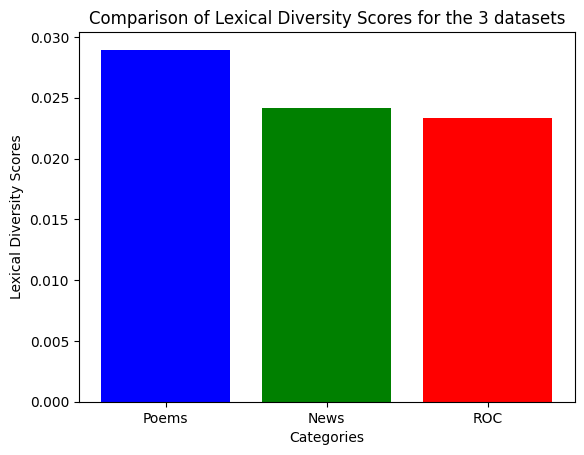

In [21]:

cat = ['Poems', 'News', 'ROC']
val = [diversity_poem, diversity_news, diversity_roc]

plt.bar(cat, val, color=['blue', 'green', 'red'])

plt.xlabel('Categories')
plt.ylabel('Lexical Diversity Scores')
plt.title('Comparison of Lexical Diversity Scores for the 3 datasets')

plt.show()

In [34]:
# Calculate cosine similarity between title and text for each row and return the average score
def cosine_similarity_score(df):

    cosine_similarities = []

    for text1, text2 in zip(df['title'], df['text']):
        vectorizer = CountVectorizer().fit_transform([text1, text2])
        vectors = vectorizer.toarray()
        similarity = cosine_similarity(vectors)[0][0]
        cosine_similarities.append(similarity)

    average_similarity = sum(cosine_similarities) / len(cosine_similarities)
    return average_similarity

In [35]:
cosine_similarity_poems = cosine_similarity_score(df_1)
print(cosine_similarity_poems)

0.9983760302058382


In [38]:
cosine_similarity_news = cosine_similarity_score(df_2)
print(cosine_similarity_news)

1.0


In [39]:
cosine_similarity_roc = cosine_similarity_score(df_3)
print(cosine_similarity_roc)

0.9999810120573436


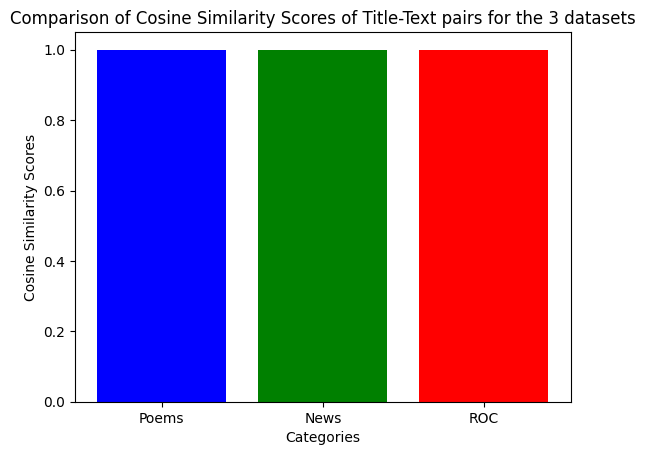

In [40]:

cat = ['Poems', 'News', 'ROC']
val = [cosine_similarity_poems, cosine_similarity_news, cosine_similarity_roc]

plt.bar(cat, val, color=['blue', 'green', 'red'])

plt.xlabel('Categories')
plt.ylabel('Cosine Similarity Scores')
plt.title('Comparison of Cosine Similarity Scores of Title-Text pairs for the 3 datasets')

plt.show()